#Machine Learning  
Tricks and libraries for building and visualizing ML models

1. causalimpact: Find Causal Relation of an
Event and a Variable in Python [pycausalimpact](https://pypi.org/project/pycausalimpact/)
2. ...

## 1. causalimpact: Find Causal Relation of an Event and a Variable in Python

In [1]:
!python --version

Python 3.7.12


In [2]:
!pip install pycausalimpact 

     |████████████████████████████████| 9.8 MB 8.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


When working with time series data, you might want to determine
whether an event has an impact on some response variable or not.
For example, if your company creates an advertisement, you might
want to track whether the advertisement results in an increase in
sales or not.
That is when causalimpact comes in handy. causalimpact analyses
the differences between expected and observed time series data.
With causalimpact, you can infer the expected effect of an
intervention in 3 lines of code.

In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
import causalimpact
from causalimpact import CausalImpact

In [18]:
# generate random sample data
np.random.seed(0)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar,ma)
X = 50 + arma_process.generate_sample(nsample=1000)
y = 1.6 * X + np.random.normal(size=1000)

(array([ 10.,  37.,  95., 171., 196., 184., 156., 102.,  38.,  11.]),
 array([44.23869861, 45.38732399, 46.53594937, 47.68457475, 48.83320013,
        49.9818255 , 51.13045088, 52.27907626, 53.42770164, 54.57632701,
        55.72495239]),
 <a list of 10 Patch objects>)

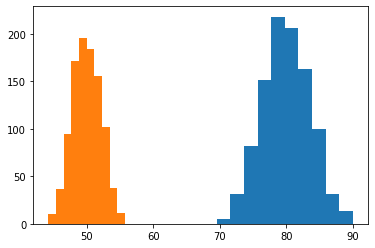

In [23]:
import matplotlib.pyplot as plt
plt.hist(y)
plt.hist(X)

In [25]:
# There is a change starting from index 800
y[800:] += 10
data = pd.DataFrame({'y':y, 'X':X}, columns = ['y','X'])
pre_period = [0, 799]
post_period = [800, 999]

,y,X
0,83.378446,51.764052
1,78.992490,48.812510
2,82.853651,52.047479
3,80.741774,50.398162
4,82.642793,51.509212


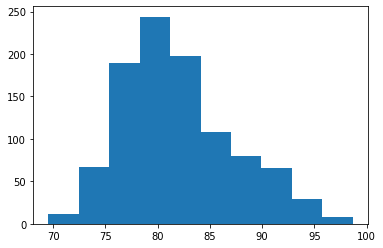

In [28]:
plt.hist(y)
data.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: nseasons, standardize. After release 0.14, this will raise.
  FutureWarning


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    90.03              18006.16
Prediction (s.d.)         79.97 (0.3)        15994.43 (60.49)
95% CI                    [79.39, 80.58]     [15878.12, 16115.23]

Absolute effect (s.d.)    10.06 (0.3)        2011.72 (60.49)
95% CI                    [9.45, 10.64]      [1890.93, 2128.03]

Relative effect (s.d.)    12.58% (0.38%)     12.58% (0.38%)
95% CI                    [11.82%, 13.3%]    [11.82%, 13.3%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


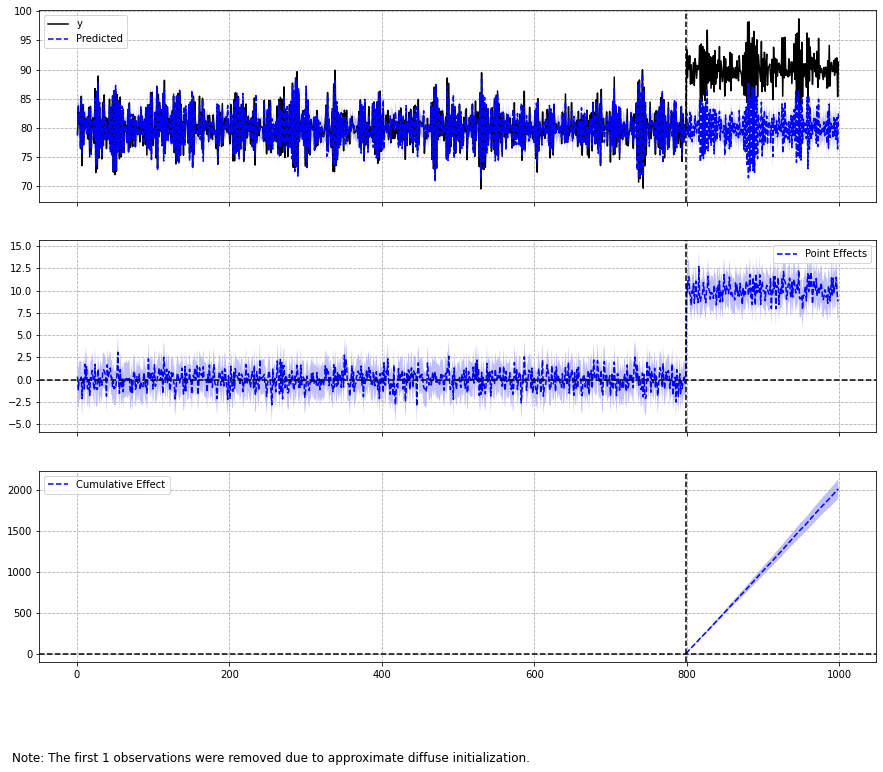

In [36]:
ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
ci.plot()

In [38]:
print(ci.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 90.03. By contrast, in the absence of an
intervention, we would have expected an average response of 79.97.
The 95% interval of this counterfactual prediction is [79.39, 80.58].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 10.06 with a 95% interval of
[9.45, 10.64]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 18006.16.
By contrast, had the intervention not taken place, we would have expected
a sum of 15994.43. The 95% interval of this prediction is [15878.12, 16115.23].


The above results are given in terms of absolute numbers. In relative
terms, the response